<a href="https://colab.research.google.com/github/selimctkl/freshman/blob/main/RFClas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
import statsmodels.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from numpy.core.fromnumeric import mean
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

filterwarnings("ignore")

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df=diabetes.copy()
df=df.dropna()
df.head()
y=df["Outcome"]
X=df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [3]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [4]:
rf_model

RandomForestClassifier()

In [5]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7489177489177489

In [6]:
#model tuning

In [7]:
rf_model

RandomForestClassifier()

In [8]:
RandomForestClassifier()


RandomForestClassifier()

In [13]:
rf_params= {"max_depth" : [2,5,8,10],
            "max_features":[2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split":[2,5,10]}

In [14]:
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv=10,
                           verbose = 2)

In [15]:
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; tota

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [16]:
print("best params"+str(rf_cv_model.best_params_))

best params{'max_depth': 8, 'max_features': 8, 'min_samples_split': 10, 'n_estimators': 500}


In [43]:
rf_tuned = RandomForestClassifier(max_depth = 8 , max_features = 8, min_samples_split = 10, n_estimators = 500)

In [44]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=8, min_samples_split=10,
                       n_estimators=500)

In [45]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

In [49]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index = X_train.columns)

Text(0.5, 0, 'Degisken Önem Düzey')

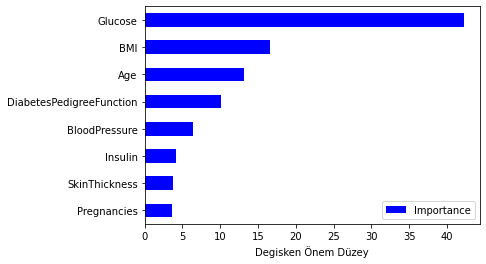

In [50]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh",color = "b")
plt.xlabel("Degisken Önem Düzey")